**Name** - Sakshee Phade<br>
**Roll No** - 43244<br>
**Batch** - R10<br>
**Problem** **Statement** - Implement SVM for performing classification and find its accuracy on the given data. (Using
Python)

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.shape

(400, 5)

In [5]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values
print(x)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [7]:
#splitting the data into training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [8]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [9]:
print("Train : ", x_train.shape)
print("Test : ", x_test.shape)

Train :  (300, 2)
Test :  (100, 2)


In [10]:
#Support Vector Classifier Linear Model
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

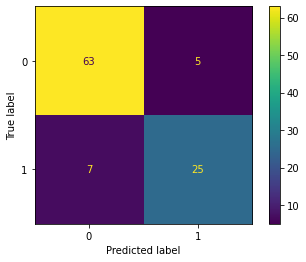

In [11]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, y_test)

In [12]:
#printing accuracy
from sklearn import metrics
print("Accuracy Linear Kernel: ", metrics.accuracy_score(y_test, y_pred))

Accuracy Linear Kernel:  0.88


In [13]:
#Support Vector Classifier RBF Model
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state = 0, gamma=0.1, C=0.02)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn import metrics
print("Accuracy RBF Kernel: ", metrics.accuracy_score(y_test, y_pred))

Accuracy RBF Kernel:  0.68


In [16]:
#Support Vector Classifier Poly Model
from sklearn.svm import SVC
classifier = SVC(kernel = "poly", random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn import metrics
print("Accuracy Poly Kernel: ", metrics.accuracy_score(y_test, y_pred))

Accuracy Poly Kernel:  0.84


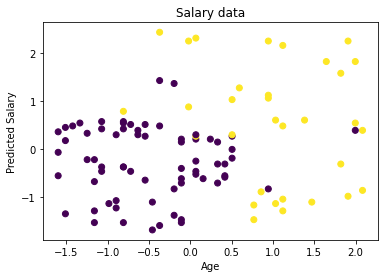

In [17]:
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test)
plt.xlabel("Age")
plt.ylabel("Predicted Salary")
plt.title("Salary data")
plt.show()

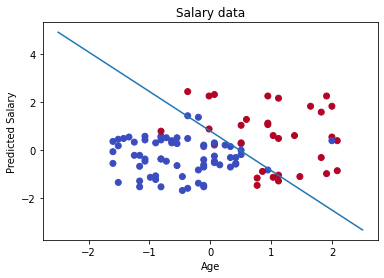

In [18]:
#Support Vector Classifier Linear Model
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test, cmap = plt.cm.coolwarm)
w = classifier.coef_[0]
w1 = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = w1 * xx - (classifier.intercept_[0]) / w[1]

plt.xlabel("Age")
plt.ylabel("Predicted Salary")
plt.title("Salary data")
plt.plot(xx, yy)
plt.show()